<h1>Objective :</h1>
<h3>The goal of this project is to analyze global pollution data to understand the relationship between pollution levels (air, water, soil) and energy recovery across different countries. By leveraging the Apriori algorithm, we aim to uncover hidden associations between pollution factors and energy consumption that can guide strategies for pollution control and energy optimization. This dataset will be used for Apriori Algorithm and evaluation/validation techniques.</h3>

<h1>Phase 1<br>Data Preprocessing and Feature Engineering
</h1>(2 steps)

<h3>Step 1 - Data Import and Cleaning
</h3>

In [56]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, LabelEncoder
from itertools import combinations
import networkx as nx

In [57]:
data=pd.read_csv('Global_Pollution_Analysis.csv')
d=data.copy()
d.head()

,Country,Year,Air_Pollution_Index,Water_Pollution_Index,Soil_Pollution_Index,Industrial_Waste (in tons),Energy_Recovered (in GWh),CO2_Emissions (in MT),Renewable_Energy (%),Plastic_Waste_Produced (in tons),Energy_Consumption_Per_Capita (in MWh),Population (in millions),GDP_Per_Capita (in USD)
0,Hungary,2005,272.70,124.27,51.95,94802.83,158.14,5.30,41.11,37078.88,12.56,42.22,20972.96
1,Singapore,2001,86.72,60.34,117.22,56283.92,498.04,6.34,36.44,33128.20,5.23,137.25,34850.41
2,Romania,2016,91.59,83.36,121.72,56256.02,489.51,49.69,9.38,18803.46,13.15,124.47,57773.15
3,Cook Islands,2018,280.61,67.16,93.58,74864.73,145.18,8.91,18.97,9182.27,0.78,67.80,21837.51
4,Djibouti,2008,179.16,127.53,121.55,76862.06,40.38,14.93,34.00,39235.12,12.84,186.52,41379.37


In [58]:
d.isnull().sum()

Country                                   0
Year                                      0
Air_Pollution_Index                       0
Water_Pollution_Index                     0
Soil_Pollution_Index                      0
Industrial_Waste (in tons)                0
Energy_Recovered (in GWh)                 0
CO2_Emissions (in MT)                     0
Renewable_Energy (%)                      0
Plastic_Waste_Produced (in tons)          0
Energy_Consumption_Per_Capita (in MWh)    0
Population (in millions)                  0
GDP_Per_Capita (in USD)                   0
dtype: int64

Null values do not exist in any column<br>
Now checking for incorrect data

In [59]:
if pd.api.types.is_float_dtype(d['Year']):
    d['Year'] = d['Year'].round().astype(int)

if pd.api.types.is_numeric_dtype(d['Air_Pollution_Index']):
    d['Air_Pollution_Index'] = d['Air_Pollution_Index'].astype(float)
d.loc[d['Air_Pollution_Index'] < 0, 'Air_Pollution_Index'] = abs(d['Air_Pollution_Index'])

if pd.api.types.is_numeric_dtype(d['Water_Pollution_Index']):
    d['Water_Pollution_Index'] = d['Water_Pollution_Index'].astype(float)
d.loc[d['Water_Pollution_Index'] < 0, 'Water_Pollution_Index'] = abs(d['Water_Pollution_Index'])

if pd.api.types.is_numeric_dtype(d['Soil_Pollution_Index']):
    d['Soil_Pollution_Index'] = d['Soil_Pollution_Index'].astype(float)
d.loc[d['Soil_Pollution_Index'] < 0, 'Soil_Pollution_Index'] = abs(d['Soil_Pollution_Index'])

if pd.api.types.is_numeric_dtype(d['Industrial_Waste (in tons)']):
    d['Industrial_Waste (in tons)'] = d['Industrial_Waste (in tons)'].astype(float)
d.loc[d['Industrial_Waste (in tons)'] < 0, 'Industrial_Waste (in tons)'] = abs(d['Industrial_Waste (in tons)'])

if pd.api.types.is_numeric_dtype(d['Energy_Recovered (in GWh)']):
    d['Energy_Recovered (in GWh)'] = d['Energy_Recovered (in GWh)'].astype(float)
d.loc[d['Energy_Recovered (in GWh)'] < 0, 'Energy_Recovered (in GWh)'] = abs(d['Energy_Recovered (in GWh)'])

if pd.api.types.is_numeric_dtype(d['CO2_Emissions (in MT)']):
    d['CO2_Emissions (in MT)'] = d['CO2_Emissions (in MT)'].astype(float)
d.loc[d['CO2_Emissions (in MT)'] < 0, 'CO2_Emissions (in MT)'] = abs(d['CO2_Emissions (in MT)'])

if pd.api.types.is_numeric_dtype(d['Renewable_Energy (%)']):
    d['Renewable_Energy (%)'] = d['Renewable_Energy (%)'].astype(float)
d.loc[d['Renewable_Energy (%)']<0, 'Renewable_Energy (%)'] = 0
d.loc[d['Renewable_Energy (%)']>100, 'Renewable_Energy (%)'] = 100

if pd.api.types.is_numeric_dtype(d['Plastic_Waste_Produced (in tons)']):
    d['Plastic_Waste_Produced (in tons)'] = d['Plastic_Waste_Produced (in tons)'].astype(float)
d.loc[d['Plastic_Waste_Produced (in tons)'] < 0, 'Plastic_Waste_Produced (in tons)'] = abs(d['Plastic_Waste_Produced (in tons)'])

if pd.api.types.is_numeric_dtype(d['Energy_Consumption_Per_Capita (in MWh)']):
    d['Energy_Consumption_Per_Capita (in MWh)'] = d['Energy_Consumption_Per_Capita (in MWh)'].astype(float)
d.loc[d['Energy_Consumption_Per_Capita (in MWh)'] < 0, 'Energy_Consumption_Per_Capita (in MWh)'] = abs(d['Energy_Consumption_Per_Capita (in MWh)'])

if pd.api.types.is_numeric_dtype(d['Population (in millions)']):
    d['Population (in millions)'] = d['Population (in millions)'].astype(float)
d.loc[d['Population (in millions)'] < 0, 'Population (in millions)'] = abs(d['Population (in millions)'])

if pd.api.types.is_numeric_dtype(d['GDP_Per_Capita (in USD)']):
    d['GDP_Per_Capita (in USD)'] = d['GDP_Per_Capita (in USD)'].astype(float)
d.loc[d['GDP_Per_Capita (in USD)'] < 0, 'GDP_Per_Capita (in USD)'] = abs(d['GDP_Per_Capita (in USD)'])

In [60]:
d

,Country,Year,Air_Pollution_Index,Water_Pollution_Index,Soil_Pollution_Index,Industrial_Waste (in tons),Energy_Recovered (in GWh),CO2_Emissions (in MT),Renewable_Energy (%),Plastic_Waste_Produced (in tons),Energy_Consumption_Per_Capita (in MWh),Population (in millions),GDP_Per_Capita (in USD)
0,Hungary,2005,272.70,124.27,51.95,94802.83,158.14,5.30,41.11,37078.88,12.56,42.22,20972.96
1,Singapore,2001,86.72,60.34,117.22,56283.92,498.04,6.34,36.44,33128.20,5.23,137.25,34850.41
2,Romania,2016,91.59,83.36,121.72,56256.02,489.51,49.69,9.38,18803.46,13.15,124.47,57773.15
3,Cook Islands,2018,280.61,67.16,93.58,74864.73,145.18,8.91,18.97,9182.27,0.78,67.80,21837.51
4,Djibouti,2008,179.16,127.53,121.55,76862.06,40.38,14.93,34.00,39235.12,12.84,186.52,41379.37
...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,Latvia,2004,115.84,78.75,42.34,49503.35,81.23,4.85,17.38,4065.66,6.28,92.96,14818.18
196,Bangladesh,2002,121.82,120.97,63.95,74694.68,25.89,46.22,16.56,36905.26,15.18,114.02,59238.04
197,Korea,2011,149.73,146.92,37.04,2818.85,293.27,38.46,38.36,24700.29,14.11,183.06,28895.94
198,Vanuatu,2002,237.20,113.63,101.96,68746.82,305.61,28.82,32.17,1443.62,12.44,40.65,17068.01


In [61]:
s=StandardScaler()
d['Air_Pollution_Index_Scaled'] = s.fit_transform(d[['Air_Pollution_Index']])
d['Water_Pollution_Index_Scaled'] = s.fit_transform(d[['Water_Pollution_Index']])
d['Soil_Pollution_Index_Scaled'] = s.fit_transform(d[['Soil_Pollution_Index']])
d['CO2_Emissions_Scaled'] = s.fit_transform(d[['CO2_Emissions (in MT)']])
d['Industrial_Waste_Scaled'] = s.fit_transform(d[['Industrial_Waste (in tons)']])

In [62]:
d

,Country,Year,Air_Pollution_Index,Water_Pollution_Index,Soil_Pollution_Index,Industrial_Waste (in tons),Energy_Recovered (in GWh),CO2_Emissions (in MT),Renewable_Energy (%),Plastic_Waste_Produced (in tons),Energy_Consumption_Per_Capita (in MWh),Population (in millions),GDP_Per_Capita (in USD),Air_Pollution_Index_Scaled,Water_Pollution_Index_Scaled,Soil_Pollution_Index_Scaled,CO2_Emissions_Scaled,Industrial_Waste_Scaled
0,Hungary,2005,272.70,124.27,51.95,94802.83,158.14,5.30,41.11,37078.88,12.56,42.22,20972.96,1.376167,0.193880,-0.619764,-1.356325,1.543328
1,Singapore,2001,86.72,60.34,117.22,56283.92,498.04,6.34,36.44,33128.20,5.23,137.25,34850.41,-1.403578,-1.153098,1.028744,-1.284276,0.124915
2,Romania,2016,91.59,83.36,121.72,56256.02,489.51,49.69,9.38,18803.46,13.15,124.47,57773.15,-1.330788,-0.668076,1.142400,1.718910,0.123888
3,Cook Islands,2018,280.61,67.16,93.58,74864.73,145.18,8.91,18.97,9182.27,0.78,67.80,21837.51,1.494394,-1.009403,0.431675,-1.106232,0.809131
4,Djibouti,2008,179.16,127.53,121.55,76862.06,40.38,14.93,34.00,39235.12,12.84,186.52,41379.37,-0.021926,0.262567,1.138106,-0.689181,0.882681
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,Latvia,2004,115.84,78.75,42.34,49503.35,81.23,4.85,17.38,4065.66,6.28,92.96,14818.18,-0.968336,-0.765207,-0.862482,-1.387500,-0.124771
196,Bangladesh,2002,121.82,120.97,63.95,74694.68,25.89,46.22,16.56,36905.26,15.18,114.02,59238.04,-0.878956,0.124351,-0.316683,1.478517,0.802869
197,Korea,2011,149.73,146.92,37.04,2818.85,293.27,38.46,38.36,24700.29,14.11,183.06,28895.94,-0.461800,0.671106,-0.996342,0.940922,-1.843872
198,Vanuatu,2002,237.20,113.63,101.96,68746.82,305.61,28.82,32.17,1443.62,12.44,40.65,17068.01,0.845568,-0.030300,0.643326,0.273086,0.583847


In [63]:
le = LabelEncoder()
d['Country_Label'] = le.fit_transform(d['Country'])
d['Year_Label'] = le.fit_transform(d['Year'])

In [64]:
d

,Country,Year,Air_Pollution_Index,Water_Pollution_Index,Soil_Pollution_Index,Industrial_Waste (in tons),Energy_Recovered (in GWh),CO2_Emissions (in MT),Renewable_Energy (%),Plastic_Waste_Produced (in tons),Energy_Consumption_Per_Capita (in MWh),Population (in millions),GDP_Per_Capita (in USD),Air_Pollution_Index_Scaled,Water_Pollution_Index_Scaled,Soil_Pollution_Index_Scaled,CO2_Emissions_Scaled,Industrial_Waste_Scaled,Country_Label,Year_Label
0,Hungary,2005,272.70,124.27,51.95,94802.83,158.14,5.30,41.11,37078.88,12.56,42.22,20972.96,1.376167,0.193880,-0.619764,-1.356325,1.543328,77,5
1,Singapore,2001,86.72,60.34,117.22,56283.92,498.04,6.34,36.44,33128.20,5.23,137.25,34850.41,-1.403578,-1.153098,1.028744,-1.284276,0.124915,147,1
2,Romania,2016,91.59,83.36,121.72,56256.02,489.51,49.69,9.38,18803.46,13.15,124.47,57773.15,-1.330788,-0.668076,1.142400,1.718910,0.123888,136,16
3,Cook Islands,2018,280.61,67.16,93.58,74864.73,145.18,8.91,18.97,9182.27,0.78,67.80,21837.51,1.494394,-1.009403,0.431675,-1.106232,0.809131,38,18
4,Djibouti,2008,179.16,127.53,121.55,76862.06,40.38,14.93,34.00,39235.12,12.84,186.52,41379.37,-0.021926,0.262567,1.138106,-0.689181,0.882681,46,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,Latvia,2004,115.84,78.75,42.34,49503.35,81.23,4.85,17.38,4065.66,6.28,92.96,14818.18,-0.968336,-0.765207,-0.862482,-1.387500,-0.124771,92,4
196,Bangladesh,2002,121.82,120.97,63.95,74694.68,25.89,46.22,16.56,36905.26,15.18,114.02,59238.04,-0.878956,0.124351,-0.316683,1.478517,0.802869,13,2
197,Korea,2011,149.73,146.92,37.04,2818.85,293.27,38.46,38.36,24700.29,14.11,183.06,28895.94,-0.461800,0.671106,-0.996342,0.940922,-1.843872,88,11
198,Vanuatu,2002,237.20,113.63,101.96,68746.82,305.61,28.82,32.17,1443.62,12.44,40.65,17068.01,0.845568,-0.030300,0.643326,0.273086,0.583847,170,2


<h3>Step 2 - Feature Engineering</h3>

In [65]:
d['Total_Pollution_Index'] = d[['Air_Pollution_Index_Scaled', 'Water_Pollution_Index', 'Soil_Pollution_Index']].mean(axis=1)

yearly_pollution_trend = d.groupby('Year')['Total_Pollution_Index'].mean().reset_index()
yearly_pollution_trend.rename(columns={'Total_Pollution_Index': 'Yearly_Avg_Pollution_Index'}, inplace=True)

d = d.merge(yearly_pollution_trend, on='Year', how='left')

d.head()

,Country,Year,Air_Pollution_Index,Water_Pollution_Index,Soil_Pollution_Index,Industrial_Waste (in tons),Energy_Recovered (in GWh),CO2_Emissions (in MT),Renewable_Energy (%),Plastic_Waste_Produced (in tons),...,GDP_Per_Capita (in USD),Air_Pollution_Index_Scaled,Water_Pollution_Index_Scaled,Soil_Pollution_Index_Scaled,CO2_Emissions_Scaled,Industrial_Waste_Scaled,Country_Label,Year_Label,Total_Pollution_Index,Yearly_Avg_Pollution_Index
0,Hungary,2005,272.70,124.27,51.95,94802.83,158.14,5.30,41.11,37078.88,...,20972.96,1.376167,0.193880,-0.619764,-1.356325,1.543328,77,5,59.198722,60.384772
1,Singapore,2001,86.72,60.34,117.22,56283.92,498.04,6.34,36.44,33128.20,...,34850.41,-1.403578,-1.153098,1.028744,-1.284276,0.124915,147,1,58.718807,51.545226
2,Romania,2016,91.59,83.36,121.72,56256.02,489.51,49.69,9.38,18803.46,...,57773.15,-1.330788,-0.668076,1.142400,1.718910,0.123888,136,16,67.916404,69.102526
3,Cook Islands,2018,280.61,67.16,93.58,74864.73,145.18,8.91,18.97,9182.27,...,21837.51,1.494394,-1.009403,0.431675,-1.106232,0.809131,38,18,54.078131,64.828293
4,Djibouti,2008,179.16,127.53,121.55,76862.06,40.38,14.93,34.00,39235.12,...,41379.37,-0.021926,0.262567,1.138106,-0.689181,0.882681,46,8,83.019358,59.278146


In [66]:
# Define thresholds for categorization
def categorize_severity(value, low, high):
    if value < low:
        return 'Low'
    elif value < high:
        return 'Medium'
    else:
        return 'High'

# Example thresholds (adjust as needed based on data distribution)
air_low, air_high = d['Air_Pollution_Index'].quantile([0.33, 0.66])
water_low, water_high = d['Water_Pollution_Index'].quantile([0.33, 0.66])

d['Air_Pollution_Severity'] = d['Air_Pollution_Index'].apply(lambda x: categorize_severity(x, air_low, air_high))
d['Water_Pollution_Severity'] = d['Water_Pollution_Index'].apply(lambda x: categorize_severity(x, water_low, water_high))

<h1>Phase 2:<br>Apriori Algorithm for Market Basket Analysis
</h1>(3 Steps)

<h3>Step 3 - Introduction to Apriori Algorithm</h3>

In [67]:
# Example dataset: binary indicators for high pollution/energy values by country
data = {
    'Country': ['Hungary', 'Singapore', 'Romania', 'Cook Islands', 'Djibouti'],
    'Air_Pollution_High': [1, 0, 0, 1, 1],
    'Water_Pollution_High': [1, 0, 0, 0, 1],
    'Energy_Recovery_High': [0, 1, 1, 0, 0],
    'CO2_Emissions_High': [0, 0, 1, 0, 0],
    'Renewable_Energy_High': [1, 0, 0, 1, 1]
}

df = pd.DataFrame(data)

# Convert to list of sets for each country where attribute is 1 (True)
transactions = []
for _, row in df.iterrows():
    items = set()
    for col in df.columns[1:]:
        if row[col] == 1:
            items.add(col)
    transactions.append(items)

# Define minimum support threshold
min_support = 0.4  # example support threshold

def get_frequent_itemsets(transactions, min_support):
    itemsets = {}
    n_transactions = len(transactions)

    # Count frequency of single items
    single_items = {}
    for transaction in transactions:
        for item in transaction:
            single_items[item] = single_items.get(item, 0) + 1
    # Filter by support
    frequent_items = {frozenset([k]): v/n_transactions for k, v in single_items.items() if v/n_transactions >= min_support}

    current_itemsets = frequent_items
    all_frequent_itemsets = frequent_items.copy()
    k = 2

    while current_itemsets:
        candidate_itemsets = set()
        keys = list(current_itemsets.keys())
        # Generate candidates of size k
        for i in range(len(keys)):
            for j in range(i+1, len(keys)):
                union_set = keys[i].union(keys[j])
                if len(union_set) == k:
                    candidate_itemsets.add(union_set)

        # Count support for candidates
        candidate_counts = {}
        for candidate in candidate_itemsets:
            count = sum(1 for transaction in transactions if candidate.issubset(transaction))
            if count/n_transactions >= min_support:
                candidate_counts[candidate] = count/n_transactions

        current_itemsets = candidate_counts
        all_frequent_itemsets.update(candidate_counts)
        k += 1

    return all_frequent_itemsets

frequent_itemsets = get_frequent_itemsets(transactions, min_support)

# Output frequent itemsets and their support
for itemset, support in frequent_itemsets.items():
    print(f'Itemset: {set(itemset)}, Support: {support:.2f}')

Itemset: {'Water_Pollution_High'}, Support: 0.40
Itemset: {'Renewable_Energy_High'}, Support: 0.60
Itemset: {'Air_Pollution_High'}, Support: 0.60
Itemset: {'Energy_Recovery_High'}, Support: 0.40
Itemset: {'Renewable_Energy_High', 'Air_Pollution_High'}, Support: 0.60
Itemset: {'Water_Pollution_High', 'Renewable_Energy_High'}, Support: 0.40
Itemset: {'Water_Pollution_High', 'Air_Pollution_High'}, Support: 0.40
Itemset: {'Water_Pollution_High', 'Renewable_Energy_High', 'Air_Pollution_High'}, Support: 0.40


<h3>Step 4 - Mining Association Rules</h3>

In [68]:
# Assuming your dataset is loaded as a DataFrame named df
# Example: df = pd.read_csv('your_dataset.csv')

# Step 1: Clean column names (remove leading/trailing spaces)
df.columns = df.columns.str.strip()

# Step 2: Define thresholds for pollution and energy variables to classify 'High' levels
pollution_thresholds = {
    'Air_Pollution_Index': 150,
    'Water_Pollution_Index': 100,
    'Soil_Pollution_Index': 80,
    'CO2_Emissions (in MT)': 100,
}

energy_thresholds = {
    'Energy_Recovered (in GWh)': 100,
    'Renewable_Energy (%)': 30,
}

# Step 3: Binarize columns based on thresholds into new '_High' columns
for col, thresh in pollution_thresholds.items():
    if col in df.columns:
        df[col + '_High'] = (df[col] >= thresh).astype(int)
    else:
        print(f"Warning: Column '{col}' not found in data.")

for col, thresh in energy_thresholds.items():
    if col in df.columns:
        df[col + '_High'] = (df[col] >= thresh).astype(int)
    else:
        print(f"Warning: Column '{col}' not found in data.")

# Step 4: Prepare transactions - convert each row into a set of attributes with 'High' = 1
apriori_cols = [col for col in df.columns if col.endswith('_High')]
transactions = []
for _, row in df[apriori_cols].iterrows():
    items = set()
    for col in apriori_cols:
        if row[col] == 1:
            items.add(col)
    transactions.append(items)

# Step 5: Apriori algorithm implementation

def get_frequent_itemsets(transactions, min_support):
    n = len(transactions)
    # Count support for single items
    single_counts = {}
    for transaction in transactions:
        for item in transaction:
            single_counts[item] = single_counts.get(item, 0) + 1
    # Keep items above min_support
    frequent = {frozenset([item]): count / n for item, count in single_counts.items() if count / n >= min_support}

    k = 2
    current_frequent = frequent.copy()
    all_frequent = frequent.copy()

    while current_frequent:
        candidates = set()
        items_list = list(current_frequent.keys())
        for i in range(len(items_list)):
            for j in range(i + 1, len(items_list)):
                union_itemset = items_list[i].union(items_list[j])
                if len(union_itemset) == k:
                    candidates.add(union_itemset)

        candidate_counts = {}
        for candidate in candidates:
            count = sum(candidate.issubset(transaction) for transaction in transactions)
            support = count / n
            if support >= min_support:
                candidate_counts[candidate] = support

        current_frequent = candidate_counts
        all_frequent.update(candidate_counts)
        k += 1

    return all_frequent

min_support = 0.1  # Minimum support threshold
min_confidence = 0.7  # Minimum confidence threshold

frequent_itemsets = get_frequent_itemsets(transactions, min_support)

# Step 6: Generate association rules from frequent itemsets

rules = []
for itemset in frequent_itemsets:
    if len(itemset) > 1:
        for size in range(1, len(itemset)):
            for antecedent in combinations(itemset, size):
                antecedent = frozenset(antecedent)
                consequent = itemset.difference(antecedent)
                support = frequent_itemsets[itemset]
                antecedent_support = frequent_itemsets.get(antecedent, 0)
                if antecedent_support > 0:
                    confidence = support / antecedent_support
                    if confidence >= min_confidence:
                        rules.append({
                            'antecedent': set(antecedent),
                            'consequent': set(consequent),
                            'support': support,
                            'confidence': confidence
                        })

# Step 7: Display results

print("Frequent Itemsets:")
for itemset, support in sorted(frequent_itemsets.items(), key=lambda x: -x[1]):
    print(f"{set(itemset)} - Support: {support:.3f}")

print("\nAssociation Rules:")
for rule in sorted(rules, key=lambda r: (-r['confidence'], -r['support'])):
    antecedent = ', '.join(rule['antecedent'])
    consequent = ', '.join(rule['consequent'])
    print(f"Rule: {{{antecedent}}} => {{{consequent}}} (Support: {rule['support']:.3f}, Confidence: {rule['confidence']:.3f})")


Frequent Itemsets:
{'Renewable_Energy_High'} - Support: 0.600
{'Air_Pollution_High'} - Support: 0.600
{'Renewable_Energy_High', 'Air_Pollution_High'} - Support: 0.600
{'Water_Pollution_High'} - Support: 0.400
{'Energy_Recovery_High'} - Support: 0.400
{'Water_Pollution_High', 'Renewable_Energy_High'} - Support: 0.400
{'Water_Pollution_High', 'Air_Pollution_High'} - Support: 0.400
{'Water_Pollution_High', 'Renewable_Energy_High', 'Air_Pollution_High'} - Support: 0.400
{'CO2_Emissions_High'} - Support: 0.200
{'Energy_Recovery_High', 'CO2_Emissions_High'} - Support: 0.200

Association Rules:
Rule: {Renewable_Energy_High} => {Air_Pollution_High} (Support: 0.600, Confidence: 1.000)
Rule: {Air_Pollution_High} => {Renewable_Energy_High} (Support: 0.600, Confidence: 1.000)
Rule: {Water_Pollution_High} => {Renewable_Energy_High} (Support: 0.400, Confidence: 1.000)
Rule: {Water_Pollution_High} => {Air_Pollution_High} (Support: 0.400, Confidence: 1.000)
Rule: {Water_Pollution_High} => {Renewable_E

<h3>Step 5 - Evaluation
</h3>

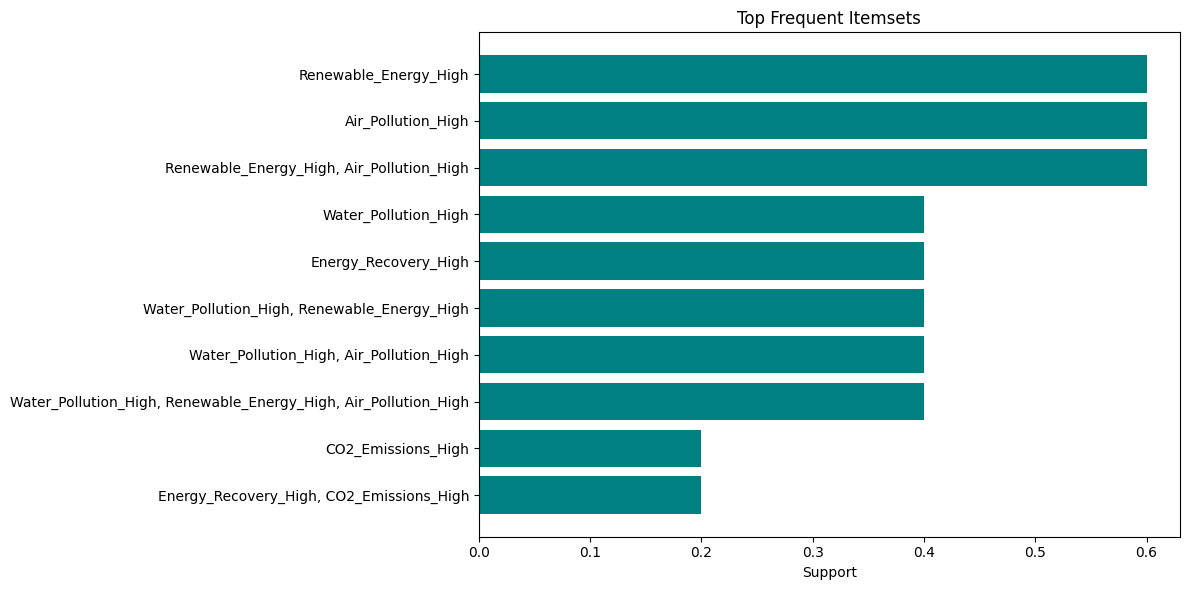

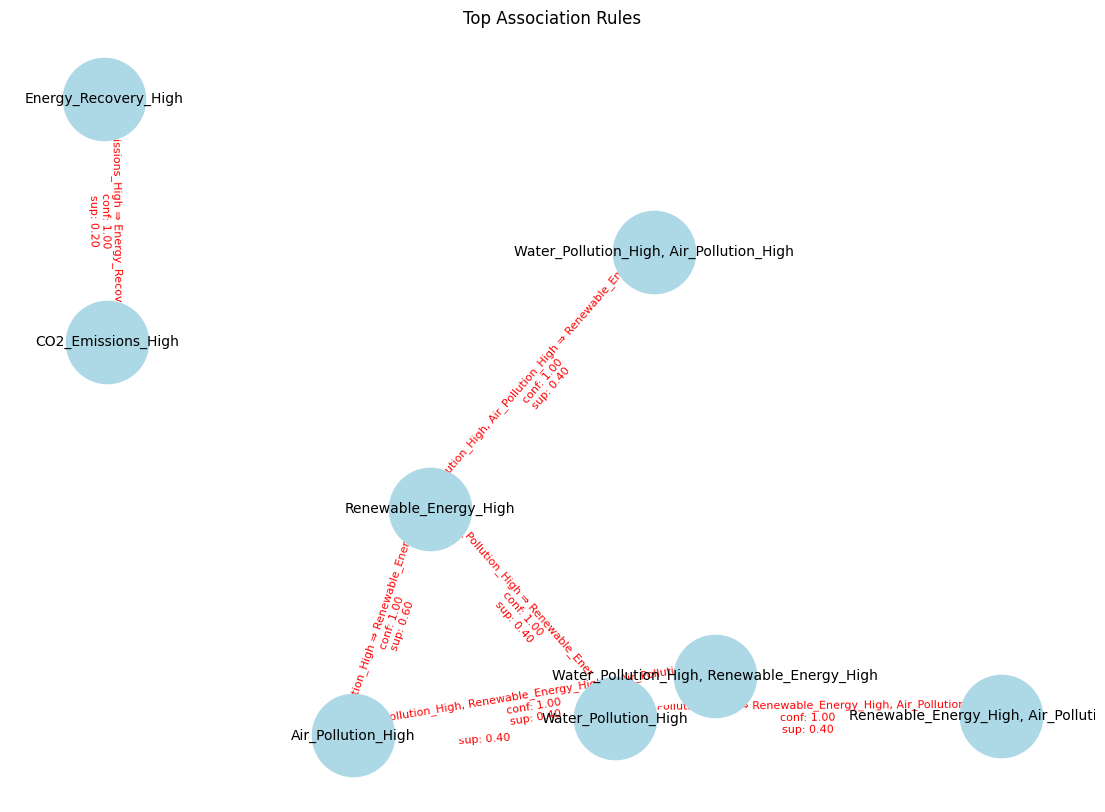

In [69]:
# Plot top frequent itemsets as horizontal bar chart
def plot_frequent_itemsets(frequent_itemsets, top_n=20):
    sorted_items = sorted(frequent_itemsets.items(), key=lambda x: x[1], reverse=True)[:top_n]
    labels = [', '.join(list(item[0])) for item in sorted_items]
    supports = [item[1] for item in sorted_items]

    plt.figure(figsize=(12, 6))
    plt.barh(labels[::-1], supports[::-1], color='teal')
    plt.xlabel('Support')
    plt.title('Top Frequent Itemsets')
    plt.tight_layout()
    plt.show()

# Plot association rules as network graph
def plot_association_rules(rules, top_n=30):
    G = nx.DiGraph()

    sorted_rules = sorted(rules, key=lambda x: x['confidence'], reverse=True)[:top_n]

    for rule in sorted_rules:
        antecedent = ', '.join(rule['antecedent'])
        consequent = ', '.join(rule['consequent'])
        label = f"{antecedent} ⇒ {consequent}\nconf: {rule['confidence']:.2f}\nsup: {rule['support']:.2f}"
        G.add_edge(antecedent, consequent, label=label, weight=rule['confidence'])

    pos = nx.spring_layout(G, k=1, iterations=50)
    plt.figure(figsize=(14, 10))

    edges = G.edges()
    weights = [G[u][v]['weight'] * 5 for u, v in edges]

    nx.draw_networkx_nodes(G, pos, node_size=3500, node_color='lightblue')
    nx.draw_networkx_edges(G, pos, edgelist=edges, width=weights, arrowsize=20, arrowstyle='-|>')
    nx.draw_networkx_labels(G, pos, font_size=10, font_family='sans-serif')

    edge_labels = {(u, v): G[u][v]['label'] for u, v in edges}
    nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_color='red', font_size=8)

    plt.title('Top Association Rules')
    plt.axis('off')
    plt.show()

plot_frequent_itemsets(frequent_itemsets)
plot_association_rules(rules)


<h1>Phase 3<br>Model Validation
</h1>(2 steps)

<h3>Step 6 - Model Validation
</h3>